The project draws lots of inspiration from:

https://github.com/silpara/simulators/blob/master/compartmental_models/SEIR%20Simulator%20in%20Python.ipynb

https://github.com/silpara/simulators/blob/master/compartmental_models/SEIRD%20Simulator%20in%20Python.ipynb

In [1]:
# Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint

In [2]:
def ode_model(y, t, R, Ms, Mi, Mss, Mis, Msi, Mii, Ass, Aii, Asi, Dss, Dsi, Dii, Beta):
    # N: population
    # R: recruitment rate
    # M: death rate
    # A: association rate
    # D: dissociation rate
    # Beta: transmission rate
    Ns, Ni, Nss, Nsi, Nii = y
    N = Ns + Ni + Nss + Nsi + Nii
    dNsdt = R - Ms*Ns - 2 * Ass * Ns ** 2 - Asi * Ns * Ni + 2 * (Mss + Dss) * Nss + (Mis + Dsi) * Nsi
    dNidt = - Mi * Ni - 2 * Aii * Ni ** 2 - Asi * Ns * Ni + 2 * (Mii + Dii) * Nii + (Msi + Dsi) * Nsi
    dNssdt = - (2 * Mss + Dss) * Nss + Ass * Ns ** 2
    dNsidt = - (Mis + Msi + Dsi + Beta) * Nsi + Asi * Ns * Ni
    dNiidt = - (2 * Mii + Dii) * Nii + Beta * Nsi + Aii * Ni ** 2
    return [dNsdt, dNidt, dNssdt, dNsidt, dNiidt]

In [3]:
def ode_solver(t, initial_conditions, params):
    initNs, initNi, initNss, initNsi, initNii = initial_conditions
    R, Ms, Mi, Mss, Mis, Msi, Mii, Ass, Aii, Asi, Dss, Dsi, Dii, Beta = params
    res = odeint(ode_model, [initNs, initNi, initNss, initNsi, initNii], t, args = (R, Ms, Mi, Mss, Mis, Msi, Mii, Ass, Aii, Asi, Dss, Dsi, Dii, Beta))
    return res

In [4]:
def main(initNs = 100, initNi = 10, initNss = 0, initNsi = 0, initNii = 0, R = 2, Ms = 0, Mi = 0.01, Mss = 0, Mis = 0.01, Msi = 0, Mii = 0.01, Ass = 1, Aii = 1, Asi = 1, Dss = 1, Dsi = 1, Dii = 1, Beta = 0.5, time = 1097):
    initial_conditions = [initNs, initNi, initNss, initNsi, initNii]
    params = [R, Ms, Mi, Mss, Mis, Msi, Mii, Ass, Aii, Asi, Dss, Dsi, Dii, Beta]
    tspan = np.arange(0.36, time, 1)
    sol = ode_solver(tspan, initial_conditions, params)
    Ns, Ni, Nss, Nsi, Nii = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3], sol[:, 4]
    plt.plot(np.log(tspan), Ns + Nsi + 2 * Nss, 'b', label = 'Susceptible')
    plt.plot(np.log(tspan), Ni + Nsi + 2 * Nii, 'r', label = 'Infected')
    plt.legend(loc='best')
    plt.xlabel('ln(t)')
    plt.grid()
    plt.show()

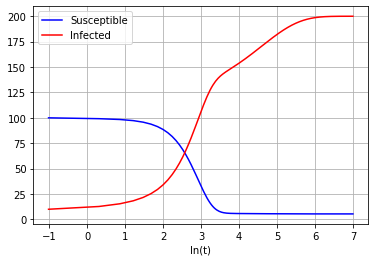

In [5]:
main()